## Full Notebook for Car Claims dataset EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Missing Values, Outliers, and Inconsistencies

In [2]:
df_car = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\car claims\carclaims.csv')

df_car.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
# Remove unnecessary fields
df_car = df_car.drop(columns=['PolicyNumber', 'AgeOfPolicyHolder'])

# Remove records with age less than 16
df_car = df_car[df_car['Age'] >= 16]

# Convert FraudFound to numerical field
df_car['FraudFound'] = df_car['FraudFound'].map({'Yes': 1, 'No': 0})

In [9]:
# Export to csv
df_car.to_csv(r'C:\Users\JT von Seggern\DS Masters Repos\799S-Data-Science-Capstone\data\carclaims_cleaned.csv', sep=',')
print("New Car Claims file saved")

New Car Claims file saved


In [5]:
df_car.info()
df_car.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  RepNumber             15100 non-null  int

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,15100,12,Jan,1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonth,15100.0,NaN,NaN,NaN,2.791126,1.28761,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15100,7,Monday,2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,15100,19,Pontiac,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccidentArea,15100,2,Urban,13554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,15100,7,Monday,3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthClaimed,15100,12,May,1376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonthClaimed,15100.0,NaN,NaN,NaN,2.694371,1.25993,1.0,2.0,3.0,4.0,5.0
Sex,15100,2,Male,12680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,15100,4,Married,10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
col_types = df_car.dtypes
col_types

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFound               int64
dtype: object

In [8]:
df_car['FraudFound'].value_counts()

FraudFound
0    14208
1      892
Name: count, dtype: int64

### EDA Roadmap

This section executes a structured exploratory data analysis for the car claims (fraud) dataset following the requested checklist:



1. Missing values, outliers, inconsistencies

2. Outlier detection / (optional) removal strategy

3. Feature engineering (scaling, encoding, derived features)

4. Dimensionality reduction (PCA) if useful

5. Visualizations (distributions, relationships, correlation)

6. Key findings and issues summary



Run cells in order; summary at the end consolidates findings.

In [6]:
def encoding(df_or_series, cat_cols: list = None, one_hot: bool = False):
    """
    Encodes categorical columns in a DataFrame or a single pandas Series.

    Args:
        df_or_series: DataFrame or Series to encode.
        cat_cols: List of columns to encode (only used if input is DataFrame).
        one_hot: If True, use one-hot encoding for DataFrame input.

    Returns:
        If input is DataFrame: (encoded DataFrame, mappings dict or list of new columns)
        If input is Series: (encoded Series, mapping dict)
    """
    if isinstance(df_or_series, pd.Series):
        uniques = df_or_series.dropna().unique().tolist()
        mapping = {cat: code for code, cat in enumerate(uniques)}
        encoded = df_or_series.map(mapping).astype("int64")
        return encoded
    
    elif isinstance(df_or_series, pd.DataFrame):
        if one_hot:
            if cat_cols is None:
                cat_cols = df_or_series.select_dtypes(include=['object', 'category']).columns.tolist()
            df_encoded = pd.get_dummies(df_or_series, columns=cat_cols, drop_first=True)
            return df_encoded
        else:
            df_encoded = df_or_series.copy()
            mappings = {}
            if cat_cols is None:
                cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
            for col in cat_cols:
                uniques = df_encoded[col].dropna().unique().tolist()
                mapping = {cat: code for code, cat in enumerate(uniques)}
                mappings[col] = mapping
                df_encoded[col] = df_encoded[col].map(mapping).astype("int64")
            return df_encoded
    
    else:
        raise ValueError("Input must be a pandas DataFrame or Series.")

In [ ]:
# 1. Missingness & Basic Profiling
df_car_encoded = encoding(df_car, one_hot=False)

print('Shape:', df_car_encoded.shape)
print('\nDtype counts:')
print(df_car_encoded.dtypes.value_counts())

# Target coercion if needed
if 'FraudFound' in df_car_encoded.columns and df_car_encoded['FraudFound'].dtype == object:
    df_car_encoded['FraudFound'] = df_car_encoded['FraudFound'].map({'Yes':1,'No':0})

missing = (df_car_encoded.isna().sum().sort_values(ascending=False)).to_frame('missing')
missing['pct'] = (missing['missing']/len(df_car_encoded)*100).round(2)
print('\nTop missing columns:')
print(missing.head(12))

num_cols_all = df_car_encoded.select_dtypes(include=[np.number]).columns
summary = df_car_encoded[num_cols_all].describe().T
summary['skew'] = df_car_encoded[num_cols_all].skew()
summary['kurtosis'] = df_car_encoded[num_cols_all].kurtosis()
print('\nNumeric summary (first 10):')
print(summary.head(10))

# Missingness bar (up to 15)
_top_miss = missing[missing['missing']>0].head(15)
if not _top_miss.empty:
    _top_miss['pct'].plot(kind='barh', figsize=(6,4), title='Missing % (Top)')
    plt.gca().invert_yaxis(); plt.tight_layout()

Shape: (15100, 32)

Dtype counts:
int64    32
Name: count, dtype: int64

Top missing columns:
                    missing  pct
Month                     0  0.0
WeekOfMonth               0  0.0
DayOfWeek                 0  0.0
Make                      0  0.0
AccidentArea              0  0.0
DayOfWeekClaimed          0  0.0
MonthClaimed              0  0.0
WeekOfMonthClaimed        0  0.0
Sex                       0  0.0
MaritalStatus             0  0.0
Age                       0  0.0
Fault                     0  0.0

Numeric summary (first 10):
                      count      mean       std  min  25%  50%  75%   max  \
Month               15100.0  5.431788  3.457219  0.0  2.0  5.0  8.0  11.0   
WeekOfMonth         15100.0  2.791126  1.287610  1.0  2.0  3.0  4.0   5.0   
DayOfWeek           15100.0  2.936225  1.972551  0.0  1.0  3.0  5.0   6.0   
Make                15100.0  3.123974  2.554446  0.0  1.0  3.0  5.0  18.0   
AccidentArea        15100.0  0.102384  0.303163  0.0  0.0  0.0 

Columns considered for outlier analysis (count=5):
['PastNumberOfClaims', 'NumberOfSuppliments', 'DriverRating', 'Age', 'WeekOfMonth'] 

Outlier summary (encoded features; IQR & Robust Z):
               feature  iqr_outliers  robustz_outliers  combined_unique  \
3                  Age           116                 0              116   
0   PastNumberOfClaims             0                 0                0   
1  NumberOfSuppliments             0                 0                0   
2         DriverRating             0                 0                0   
4          WeekOfMonth             0                 0                0   

   pct_rows_flagged  iqr_low  iqr_high  median  mad  
3              0.77      4.0      76.0    39.0  9.0  
0              0.00     -3.0       5.0     1.0  1.0  
1              0.00     -3.0       5.0     1.0  1.0  
2              0.00     -2.0       6.0     2.0  1.0  
4              0.00     -1.0       7.0     3.0  1.0  

Total rows with any outlier: 116 (0

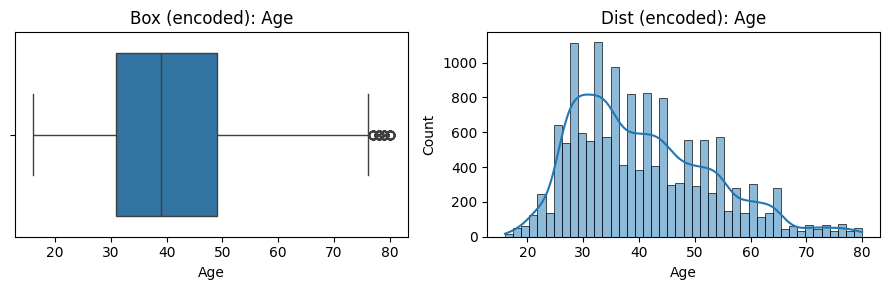

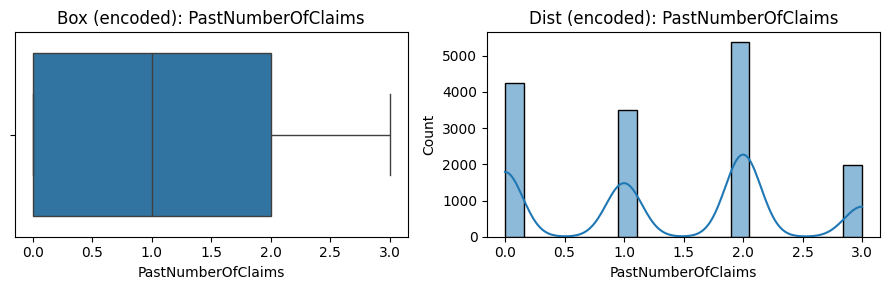

In [ ]:
# 2. Outlier Detection & Optional Handling (Improved + Encoding Support)
from scipy import stats

# --- 2.1 Encode categoricals so all features are numeric (using provided encoding function) ---
# We work on a copy to avoid mutating the raw df_car prematurely.
try:
    df_encoded = encoding(df_car_encoded.copy())  # label-encodes each categorical column
except Exception as e:
    print('Encoding failed; falling back to numeric-only columns. Error:', e)
    df_encoded = df_car_encoded.select_dtypes(include=[np.number]).copy()

# Exclude target(s) from outlier detection
target_cols = "Fraudfound"
numeric_cols_all = [c for c in df_encoded.select_dtypes(include=[np.number]).columns if c not in target_cols]

# --- 2.2 Define candidate columns ---
# User-specified preference list (only those present will be used); otherwise fallback to all numeric
user_cols = ['ClaimAmount','PastNumberOfClaims','NumberOfSuppliments','DriverRating','Age','WeekOfMonth']
key_num = [c for c in user_cols if c in numeric_cols_all]
if not key_num:
    key_num = numeric_cols_all  # fallback

print('Columns considered for outlier analysis (count={}):'.format(len(key_num)))
print(key_num[:15], '...' if len(key_num) > 15 else '')

# --- 2.3 Compute outlier flags (IQR + Robust Z via MAD) ---
outlier_rows = {}
results = []
for c in key_num:
    s = df_encoded[c].astype(float)
    q1, q3 = s.quantile([0.25,0.75])
    iqr = (q3 - q1) if (q3 - q1) != 0 else 1e-9
    iqr_low, iqr_high = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_mask = (s < iqr_low) | (s > iqr_high)

    med = s.median()
    mad = np.median(np.abs(s - med)) or 1e-9
    robust_z = 0.6745 * (s - med) / mad
    rz_mask = np.abs(robust_z) > 3.5

    combined_mask = iqr_mask | rz_mask
    outlier_rows[c] = combined_mask

    results.append({
        'feature': c,
        'iqr_outliers': int(iqr_mask.sum()),
        'robustz_outliers': int(rz_mask.sum()),
        'combined_unique': int(combined_mask.sum()),
        'pct_rows_flagged': round(100*combined_mask.mean(), 2),
        'iqr_low': iqr_low,
        'iqr_high': iqr_high,
        'median': med,
        'mad': mad
    })

outlier_summary = pd.DataFrame(results).sort_values('pct_rows_flagged', ascending=False)
print('\nOutlier summary (encoded features; IQR & Robust Z):')
print(outlier_summary.head(25))

# Unified flags
outlier_flags = pd.DataFrame({f'{c}_outlier': mask for c, mask in outlier_rows.items()})
outlier_flags['any_outlier'] = outlier_flags.any(axis=1)
print('\nTotal rows with any outlier:', int(outlier_flags['any_outlier'].sum()), f"({round(100*outlier_flags['any_outlier'].mean(),2)}%)")

# --- 2.4 Handling strategy ---
# Options: 'flag' (default, keep all rows + flags), 'winsorize', 'drop'
handle_strategy = 'flag'

clean_df = df_encoded.copy()  # keep original feature names for interpretability

if handle_strategy == 'drop':
    clean_df = clean_df.loc[~outlier_flags['any_outlier']].copy()
elif handle_strategy == 'winsorize':
    # Winsorize only the user-selected numeric columns (existing in original df and numeric)
    for row in results:
        c = row['feature']
        if c in clean_df.columns and pd.api.types.is_numeric_dtype(clean_df[c]):
            clean_df[c] = clean_df[c].clip(lower=row['iqr_low'], upper=row['iqr_high'])
# If flag: just append flags for modeling context
if handle_strategy == 'flag':
    flag_cols = outlier_flags.add_prefix('flag_')
    clean_df = pd.concat([clean_df.reset_index(drop=True), flag_cols.reset_index(drop=True)], axis=1)

print('Post-handling dataset shape:', clean_df.shape)

# --- 2.5 Diagnostic plots for top features by % flagged ---
plot_feats = outlier_summary.head(2)['feature'].tolist()
for c in plot_feats:
    if c in df_encoded.columns:
        fig, ax = plt.subplots(1, 2, figsize=(9, 3))
        sns.boxplot(x=df_encoded[c], ax=ax[0])
        sns.histplot(df_encoded[c], kde=True, ax=ax[1])
        ax[0].set_title(f'Box (encoded): {c}')
        ax[1].set_title(f'Dist (encoded): {c}')
        plt.tight_layout()

# Expose cleaned dataset for downstream steps
# (Subsequent cells already expect df_car_clean)
df_car_clean = clean_df

# Save outlier summary for reference (optional)
outlier_summary.to_csv('outlier_summary.csv', index=False)

In [9]:
# 3. Inconsistency Checks (Business Rules)
# Example: If dataset has component claims summing to ClaimAmount; adjust field names if needed.
components = [c for c in ['InjuryClaim','PropertyClaim','VehicleClaim'] if c in df_car_clean.columns]
if len(components) == 3 and 'ClaimAmount' in df_car_clean.columns:
    resid = df_car_clean['ClaimAmount'] - df_car_clean[components].sum(axis=1)
    resid_abs = resid.abs()
    print('Residual summary (ClaimAmount - sum(components))')
    print(resid_abs.describe())
    inconsistent_rows = resid_abs[resid_abs > 1].shape[0]
    print('Rows with |residual| > 1:', inconsistent_rows)
else:
    print('Component claims not all present; skipping sum consistency check.')

# Example simple domain rule checks (adjust feature names as present)
if 'Age' in df_car_clean.columns:
    invalid_age = (df_car_clean['Age'] < 16) | (df_car_clean['Age'] > 100)
    print('Suspicious policy holder ages:', int(invalid_age.sum()))

Component claims not all present; skipping sum consistency check.
Suspicious policy holder ages: 0


In [10]:
# 4. Feature Engineering (Encoding & Derived Features)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

work = df_encoded.copy()

# Example binary target standardization
if 'FraudFound' in work.columns and work['FraudFound'].dtype != int:
    work['FraudFound'] = work['FraudFound'].map({'Yes':1,'No':0})

# Ratio features (only if columns exist)
if set(['InjuryClaim','ClaimAmount']).issubset(work.columns):
    work['injury_ratio'] = work['InjuryClaim'] / work['ClaimAmount'].replace(0,np.nan)
if set(['PropertyClaim','ClaimAmount']).issubset(work.columns):
    work['property_ratio'] = work['PropertyClaim'] / work['ClaimAmount'].replace(0,np.nan)
if set(['VehicleClaim','ClaimAmount']).issubset(work.columns):
    work['vehicle_ratio'] = work['VehicleClaim'] / work['ClaimAmount'].replace(0,np.nan)

# Log transforms for skewed numeric (add 1 to avoid log(0))
skew_candidates = [c for c in ['ClaimAmount','InjuryClaim','PropertyClaim','VehicleClaim'] if c in work.columns]
for c in skew_candidates:
    work[c+'_log1p'] = np.log1p(work[c])

# Simple high-cardinality handling: frequency encode selected categoricals
cat_cols = work.select_dtypes(include=['object']).columns.tolist()
freq_encode_cols = [c for c in cat_cols if 12 < work[c].nunique() <= 100]
for c in freq_encode_cols:
    freq_map = work[c].value_counts() / len(work)
    work[c+'_freq'] = work[c].map(freq_map)

# Prepare sets for scaler & encoder example (subset)
num_for_model = [c for c in work.select_dtypes(include=[np.number]).columns if c != 'FraudFound']
small_cat = [c for c in cat_cols if work[c].nunique() <= 12]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_for_model[:10]),  # limit for demo
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), small_cat[:5])
])

prep_pipeline = Pipeline([
    ('pre', preprocessor)
])

print('Engineered columns added:', set(work.columns) - set(df_car_clean.columns))
print('Sample of frequency encoded cols:', freq_encode_cols[:5])

Engineered columns added: set()
Sample of frequency encoded cols: []


In [11]:
# 5. Dimensionality Reduction (PCA on numeric subset)
from sklearn.decomposition import PCA

numeric_model_cols = [c for c in work.select_dtypes(include=[np.number]).columns if c != 'FraudFound']
X_num = work[numeric_model_cols].fillna(work[numeric_model_cols].median())

scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X_num)

pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T, index=numeric_model_cols, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
var_ratio = pca.explained_variance_ratio_

# Aggregate importance
weighted = (loadings.values**2) * var_ratio
importance = weighted.sum(axis=1)
importance = importance / importance.sum()
feature_importance_pca = pd.Series(importance, index=numeric_model_cols).sort_values(ascending=False)

print('PCA components:', pca.n_components_)
print('Explained variance cumulative:', var_ratio.cumsum())
print('Top 10 variance-weighted contributing features:')
print(feature_importance_pca.head(10))

PCA components: 25
Explained variance cumulative: [0.09060125 0.15130877 0.20506045 0.25160473 0.2932874  0.33236722
 0.37115103 0.40819711 0.44212031 0.47590072 0.50890957 0.54154418
 0.57380528 0.60594951 0.6378089  0.66922527 0.70037469 0.73145059
 0.7617696  0.79103903 0.81933668 0.84537997 0.8710808  0.89633457
 0.91943787]
Top 10 variance-weighted contributing features:
RepNumber           0.035073
Year                0.035072
DayOfWeek           0.035065
AccidentArea        0.035062
DayOfWeekClaimed    0.035049
MonthClaimed        0.035047
DriverRating        0.035047
VehiclePrice        0.035039
Month               0.035031
WitnessPresent      0.035016
dtype: float64


C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_4080\2928871352.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,3))


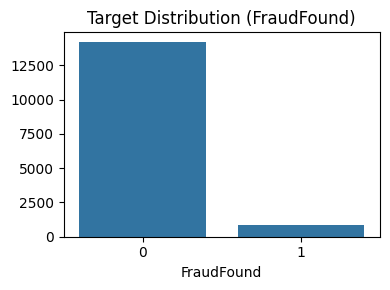

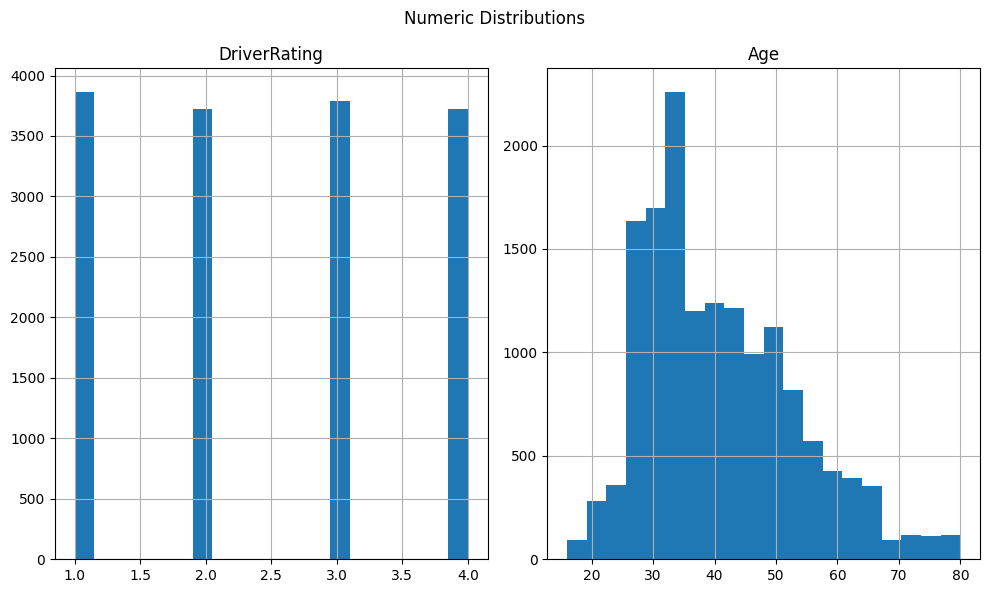

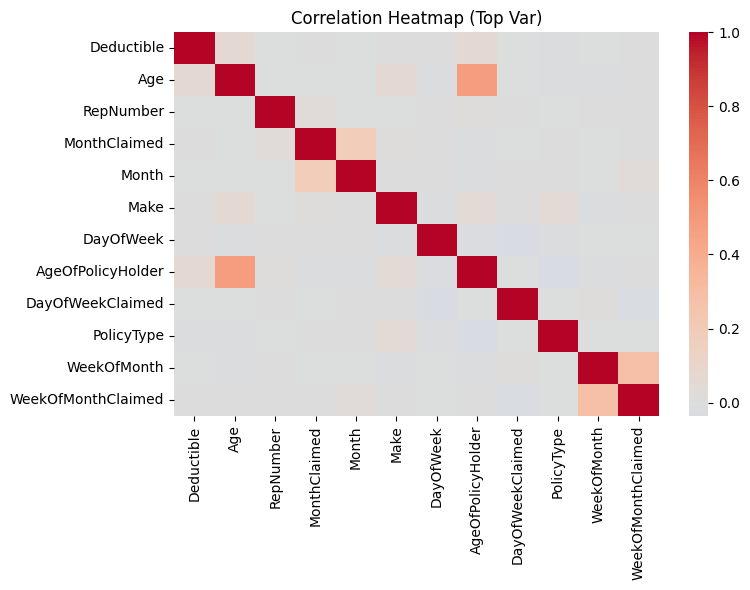

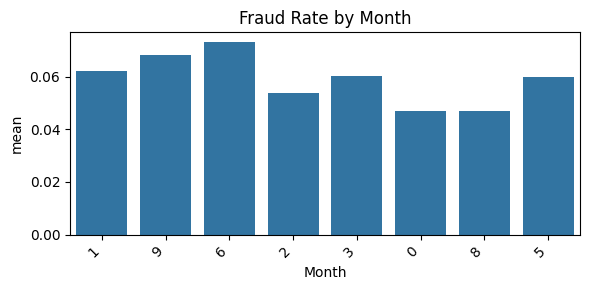

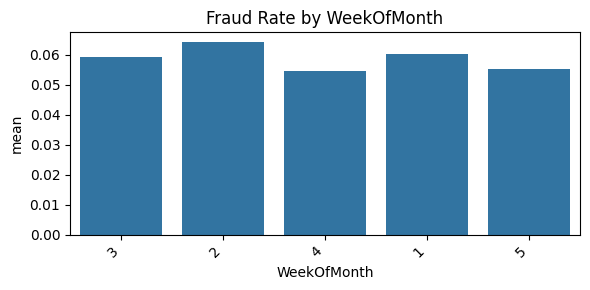

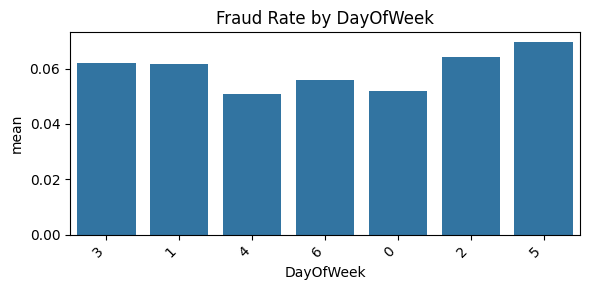

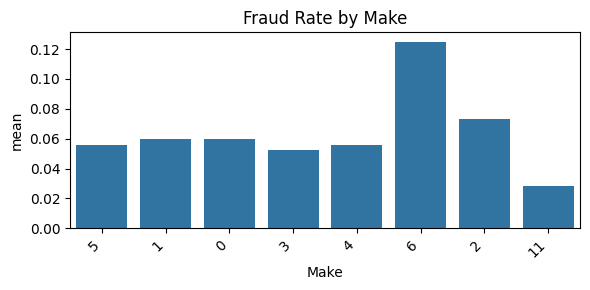

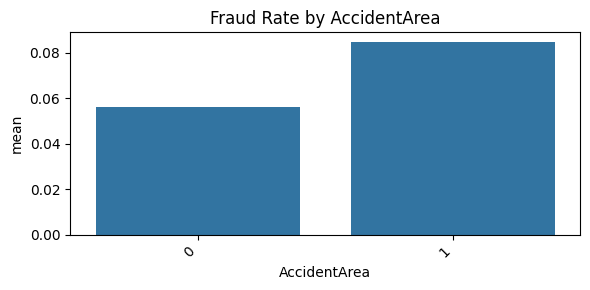

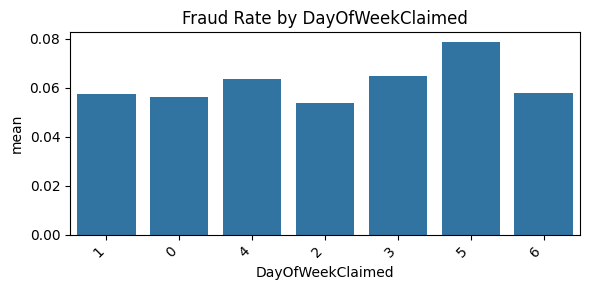

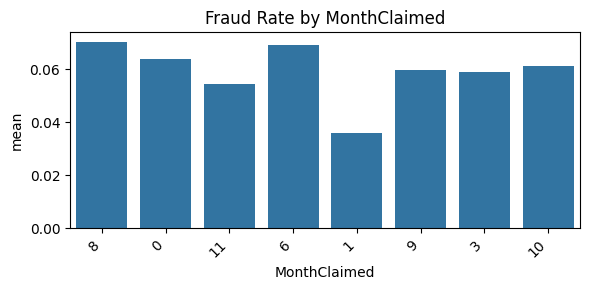

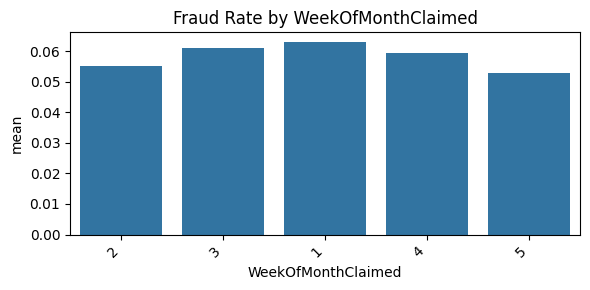

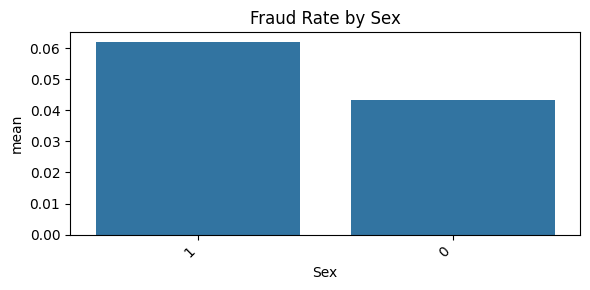

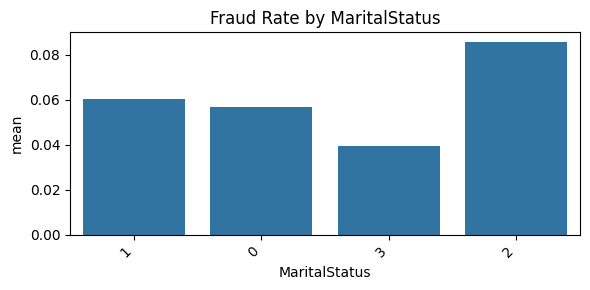

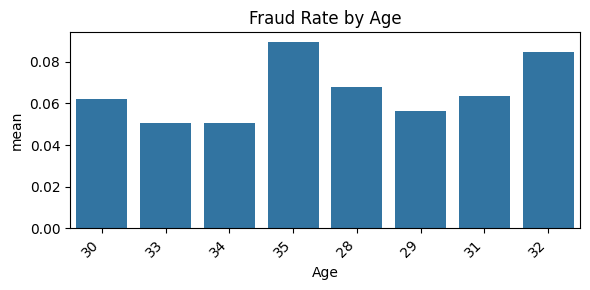

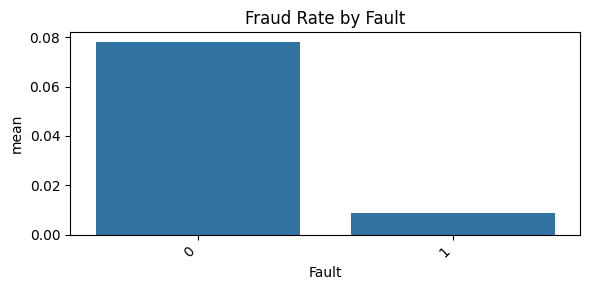

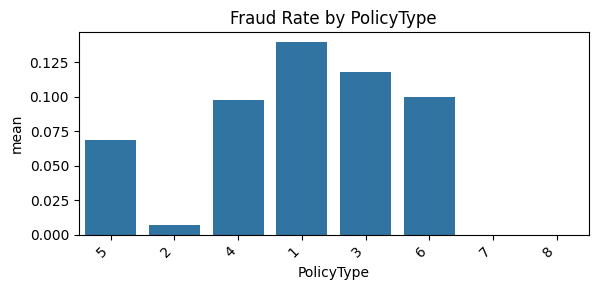

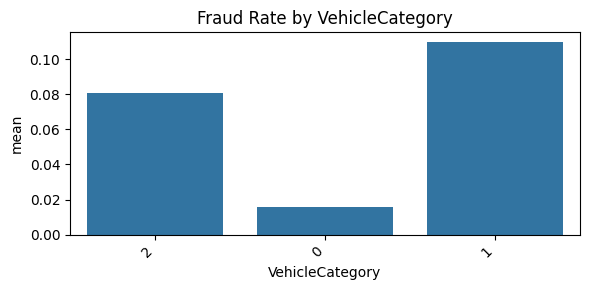

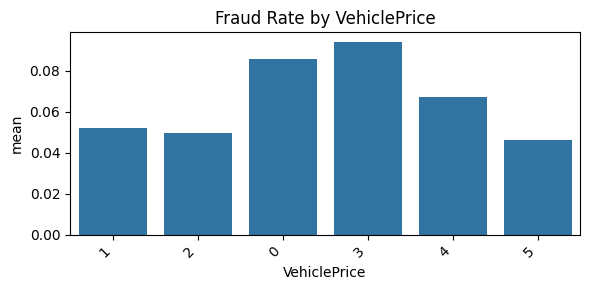

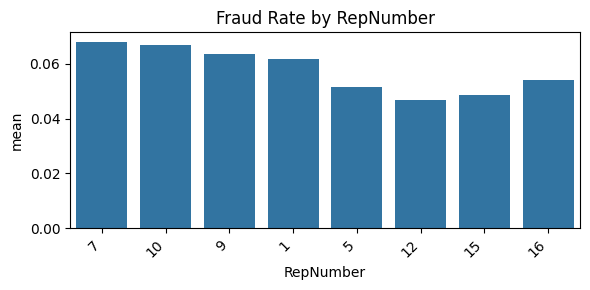

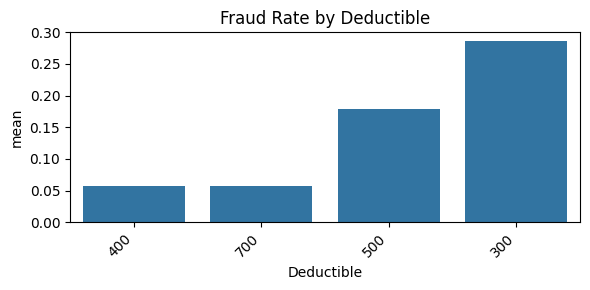

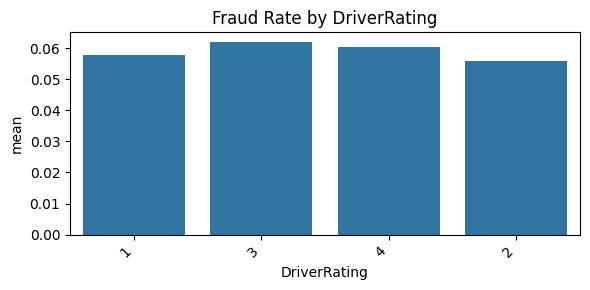

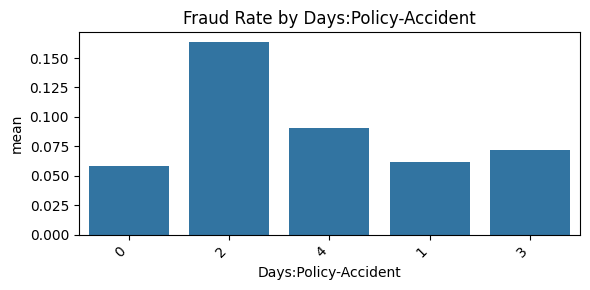

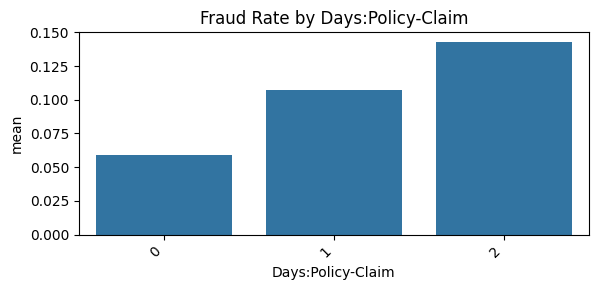

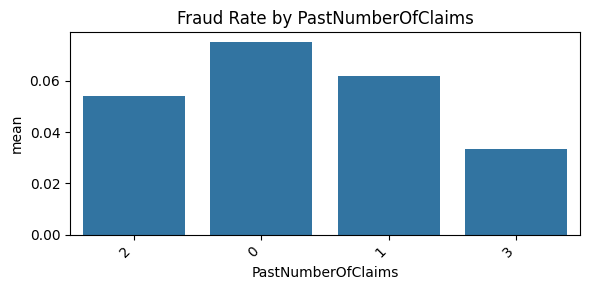

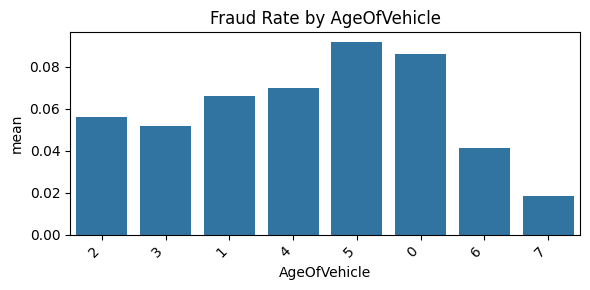

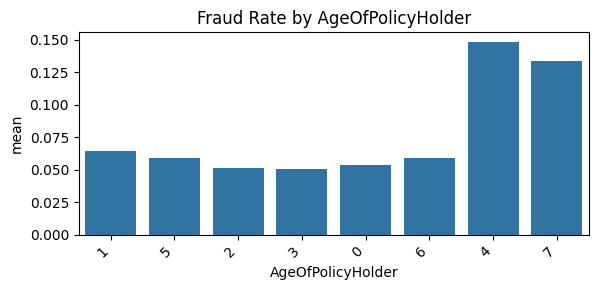

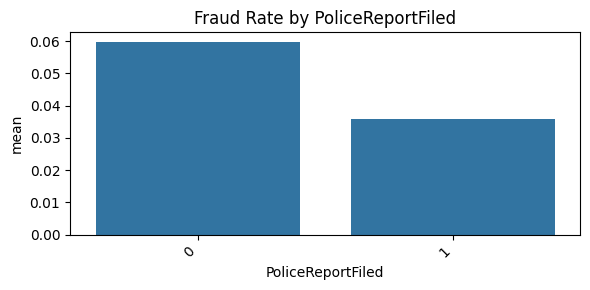

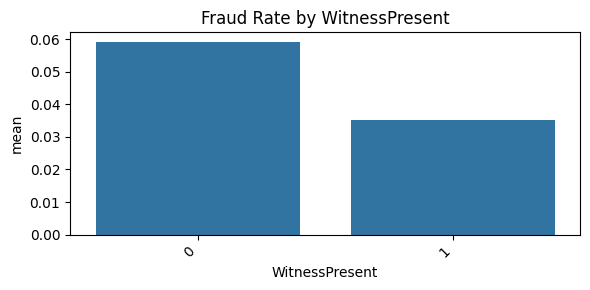

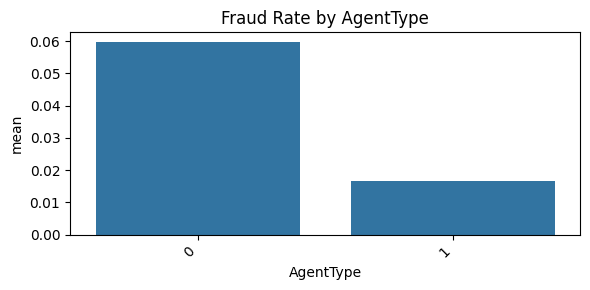

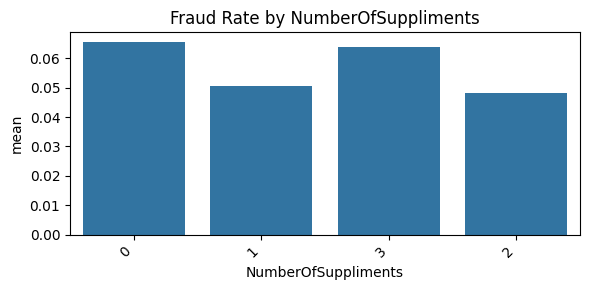

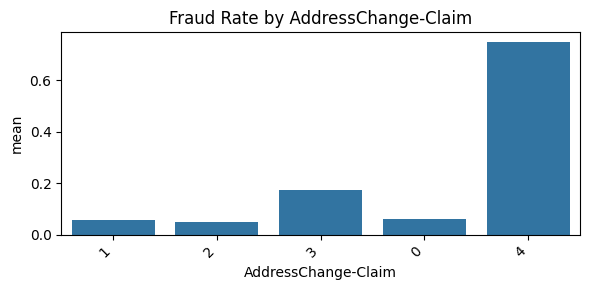

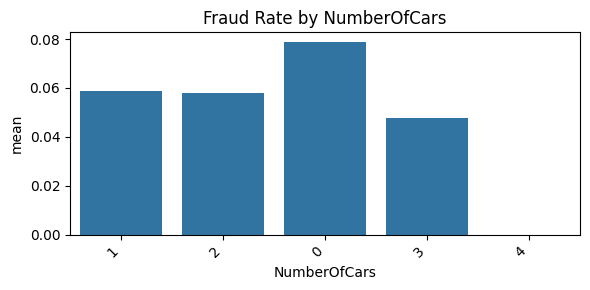

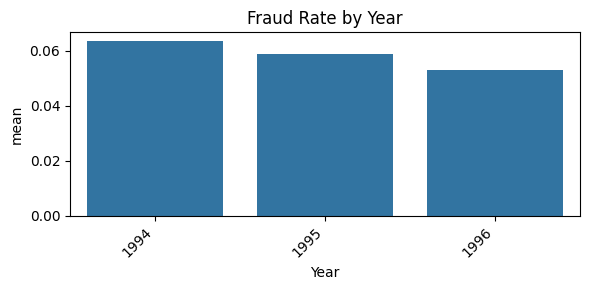

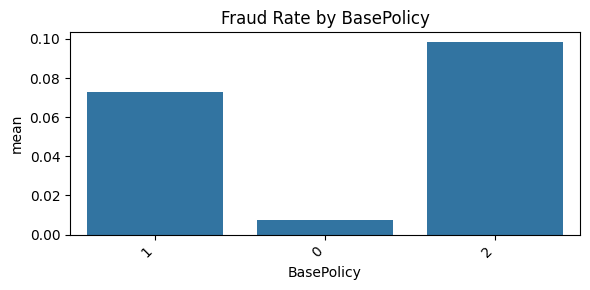

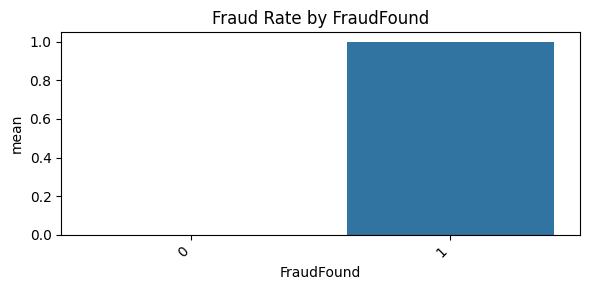

In [12]:
# 6. Visualizations (selected)
import seaborn as sns, matplotlib.pyplot as plt

# Target distribution if present
if 'FraudFound' in work.columns:
    counts = work['FraudFound'].value_counts()
    plt.figure(figsize=(4,3))
    sns.barplot(x=counts.index.astype(str), y=counts.values)
    plt.title('Target Distribution (FraudFound)')
    plt.tight_layout()

# Histograms for key numeric (log where skewed)
plot_nums = [c for c in ['ClaimAmount','InjuryClaim','PropertyClaim','VehicleClaim','DriverRating','Age'] if c in work.columns][:6]
work[plot_nums].hist(figsize=(10,6), bins=20)
plt.suptitle('Numeric Distributions'); plt.tight_layout()

# Correlation heatmap (top 12 variance features)
variances = work.select_dtypes(include=[np.number]).var().sort_values(ascending=False)
cor_cols = variances.head(12).index
corr = work[cor_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Top Var)'); plt.tight_layout()

# Fraud rate by categorical (example)
cat_example = [c for c in work.columns]
for c in cat_example:
    if 'FraudFound' in work.columns:
        fr = work.groupby(c)['FraudFound'].agg(['mean','count']).sort_values('count', ascending=False).head(8)
        plt.figure(figsize=(6,3))
        sns.barplot(x=fr.index.astype(str), y=fr['mean'])
        plt.title(f'Fraud Rate by {c}')
        plt.xticks(rotation=45, ha='right'); plt.tight_layout()

PCA components retained: 27
Cumulative explained variance:
[0.09060125 0.15130877 0.20506045 0.25160473 0.2932874  0.33236722
 0.37115103 0.40819711 0.44212031 0.47590072 0.50890957 0.54154418
 0.57380528 0.60594951 0.6378089  0.66922527 0.70037469 0.73145059
 0.7617696  0.79103903 0.81933668 0.84537997 0.8710808  0.89633457
 0.91943787 0.94174088 0.96006128]

Top 15 contributing original features (variance-weighted):
DayOfWeek              0.033599
PoliceReportFiled      0.033598
WeekOfMonth            0.033596
DriverRating           0.033596
Month                  0.033595
DayOfWeekClaimed       0.033595
WeekOfMonthClaimed     0.033594
RepNumber              0.033594
WitnessPresent         0.033590
MonthClaimed           0.033589
Deductible             0.033589
Year                   0.033588
NumberOfSuppliments    0.033588
AccidentArea           0.033585
Make                   0.033574
dtype: float64

Preview of strongest loadings (top 15 by max abs):
                           PC1 

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_4080\777313530.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loading_preview['max_abs_loading'] = loadings_full.abs().max(axis=1)
C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_4080\777313530.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loading_preview.sort_values('max_abs_loading', ascending=False, inplace=True)


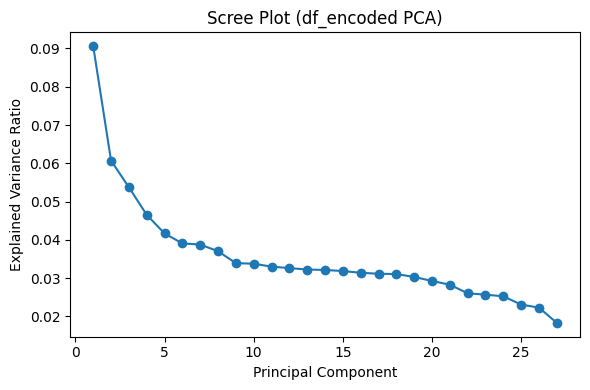

In [13]:
# PCA directly on df_encoded (ensure it exists from earlier cell)
from sklearn.decomposition import PCA

if 'df_encoded' not in globals():
    raise NameError('df_encoded not found. Run the encoding cell first.')

# Drop target(s) if present
pca_exclude = [c for c in ['FraudFound','fraud_reported'] if c in df_encoded.columns]
X_pca_src = df_encoded.drop(columns=pca_exclude, errors='ignore')

# Keep only numeric columns (after encoding they should all be numeric)
X_pca_src = X_pca_src.select_dtypes(include=[np.number])

# Remove any constant columns to avoid numerical artifacts
constant_cols = [c for c in X_pca_src.columns if X_pca_src[c].nunique() <= 1]
if constant_cols:
    X_pca_src = X_pca_src.drop(columns=constant_cols)
    print('Dropped constant columns for PCA:', constant_cols)

scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X_pca_src)

# Retain components explaining 95% variance (adjust as needed)
pca_full = PCA(n_components=0.95, random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled_full)

expl_var = pca_full.explained_variance_ratio_
print(f'PCA components retained: {pca_full.n_components_}')
print('Cumulative explained variance:')
print(np.cumsum(expl_var))

# Loadings matrix
loadings_full = pd.DataFrame(pca_full.components_.T,
                             index=X_pca_src.columns,
                             columns=[f'PC{i+1}' for i in range(pca_full.n_components_)])

# Variance-weighted feature contribution
weighted_full = (loadings_full.values**2) * expl_var
importance_full = weighted_full.sum(axis=1)
importance_full = importance_full / importance_full.sum()
feature_importance_pca_full = pd.Series(importance_full, index=X_pca_src.columns).sort_values(ascending=False)

print('\nTop 15 contributing original features (variance-weighted):')
print(feature_importance_pca_full.head(15))

# Optional: create a summary DataFrame with first few component loadings
loading_preview = loadings_full.iloc[:, :5]
loading_preview['max_abs_loading'] = loadings_full.abs().max(axis=1)
loading_preview.sort_values('max_abs_loading', ascending=False, inplace=True)
print('\nPreview of strongest loadings (top 15 by max abs):')
print(loading_preview.head(15).drop(columns=['max_abs_loading']))

# Store PCA outputs for downstream modeling if desired
pca_results = {
    'pca_model': pca_full,
    'scaled_matrix': X_scaled_full,
    'scores': X_pca_full,
    'loadings': loadings_full,
    'feature_importance': feature_importance_pca_full
}

# (Optional) Scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(range(1, len(expl_var)+1), expl_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (df_encoded PCA)')
plt.tight_layout()

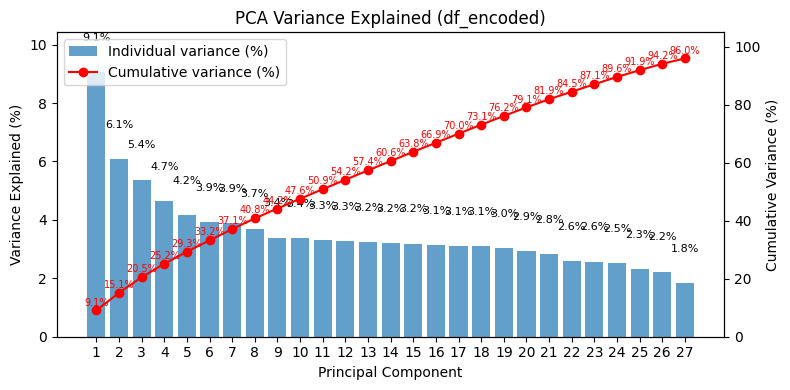

In [14]:
# Visualize explained variance per PCA component
expl_var_pct = (expl_var * 100).round(2)
cum_expl_pct = expl_var_pct.cumsum()

fig, ax1 = plt.subplots(figsize=(8, 4))
components = np.arange(1, len(expl_var_pct) + 1)
bars = ax1.bar(components, expl_var_pct, alpha=0.7, label='Individual variance (%)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('PCA Variance Explained (df_encoded)')
ax1.set_xticks(components)
ax1.set_ylim(0, expl_var_pct.max() * 1.15 if len(expl_var_pct) else 1)

ax2 = ax1.twinx()
ax2.plot(components, cum_expl_pct, color='red', marker='o', label='Cumulative variance (%)')
ax2.set_ylabel('Cumulative Variance (%)')
ax2.set_ylim(0, 105)

handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax1.legend(handles, labels, loc='upper left')

for rect, pct, cum in zip(bars, expl_var_pct, cum_expl_pct):
    ax1.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=8)
    ax2.text(rect.get_x() + rect.get_width() / 2, cum + 1, f"{cum:.1f}%",
             ha='center', va='bottom', fontsize=7, color='red')

plt.tight_layout()
plt.show()

### 7. Key Findings & Next Steps (Populate After Execution)
- **Data Shape:** *(add rows x columns)*; target imbalance: *(add % fraud)*.
- **Missingness:** Top missing columns: *(list)* with percentages; plan (impute / missing category / drop).
- **Outliers:** Highest proportion in *(feature)*; strategy: retain with flag vs remove.
- **Consistency:** Claim amount components difference: median *(value)*; anomalies flagged (count).
- **Feature Engineering:** Added ratios (injury/property/vehicle), log transforms, frequency encodings; verify no leakage.
- **PCA:** Retained *n* components for 90% variance; top contributing raw features: *(list)*.
- **Correlations:** No single strong numeric predictor; multivariate interactions likely needed.
- **High-Value Categorical Signals:** *(cite categories with higher fraud rate)*.

**Next Modeling Steps:**
1. Finalize imputation & encoding pipeline.
2. Train baseline (logistic/GBM) with stratified CV; evaluate ROC AUC & PR AUC.
3. Calibrate probabilities; choose operating threshold based on cost matrix.
4. Fairness audit (fraud rate by demographic-like attributes if present).